In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# --------------------- Data Precess ---------------------
# Reading death data 2014-2018
data_14_18 = pd.read_csv("Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018.csv", 
                    index_col="Week Ending Date",
                    parse_dates=True)
data_14_18 = data_14_18[["Jurisdiction of Occurrence", "All  Cause"]]
data_14_18 = data_14_18.rename(columns={
    "Jurisdiction of Occurrence" : "location",
    "All  Cause" : "death_total"
})
data_14_18 = data_14_18.rename_axis("date")

In [7]:
data_14_18.head(10)

,location,death_total
date,,
2014-01-04,Alabama,355
2014-01-11,Alabama,872
2014-01-18,Alabama,1044
2014-01-25,Alabama,1022
2014-02-01,Alabama,1040
2014-02-08,Alabama,992
2014-02-15,Alabama,942
2014-02-22,Alabama,990
2014-03-01,Alabama,958


In [4]:
data_19_20 = pd.read_csv("Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv", 
                    index_col="Week Ending Date", 
                    parse_dates=True)
data_19_20 = data_19_20[["Jurisdiction of Occurrence", "All Cause", "COVID-19 (U071, Multiple Cause of Death)"]]
data_19_20 = data_19_20.rename(columns={
    "Jurisdiction of Occurrence" : "location",
    "All Cause" : "death_total",
    "COVID-19 (U071, Multiple Cause of Death)" : "death_covid"
})
data_19_20 = data_19_20.rename_axis("date")

In [8]:
data_19_20.head(10)

,location,death_total,death_covid
date,,,
2019-01-05,Alabama,1077.0,0.0
2019-01-12,Alabama,1090.0,0.0
2019-01-19,Alabama,1114.0,0.0
2019-01-26,Alabama,1063.0,0.0
2019-02-02,Alabama,1095.0,0.0
2019-02-09,Alabama,1092.0,0.0
2019-02-16,Alabama,1103.0,0.0
2019-02-23,Alabama,1064.0,0.0
2019-03-02,Alabama,1050.0,0.0


In [9]:
# Integrate two datasets
data = pd.concat([data_14_18, data_19_20], axis=0)
values = {"death_total" : 0, "death_covid" : 0}
data = data.fillna(value=values)
data["death_non_covid"] = data["death_total"] - data["death_covid"]
data = data.astype({"death_total":"int32", "death_covid":"int32", "death_non_covid":"int32"})
data_covid = pd.pivot_table(data,index="date", columns="location", values="death_covid", fill_value=0).astype(int)
data_total = pd.pivot_table(data,index="date", columns="location", values="death_total", fill_value=0).astype(int)
data_non_covid = pd.pivot_table(data,index="date", columns="location", values="death_non_covid", fill_value=0).astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


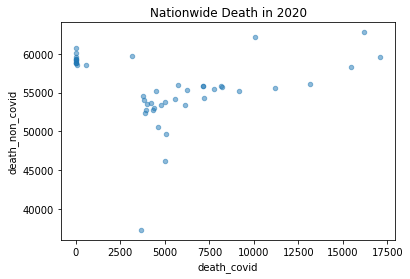

In [10]:
# --------------------- Data Visualization ---------------------
# View 1 - Nationwide death in 2020 (COVID vs non-COVID)
data[(data.index > '2020-01-01') & (data["location"] == "United States")].plot.scatter(x="death_covid", y="death_non_covid", alpha=0.5, title="Nationwide Death in 2020")


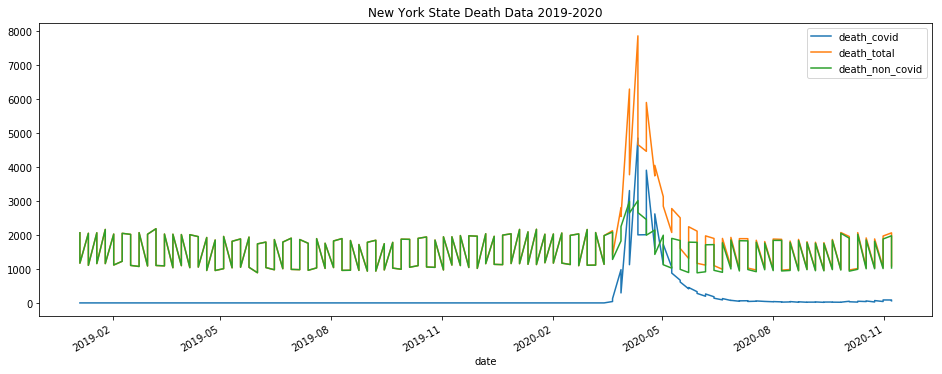

In [11]:
# View 2 - New York Death from 2019
data[(data.index > '2019-01-01') & ((data["location"] == "New York") | (data["location"] == "New York City"))].plot(figsize=(16,6), title="New York State Death Data 2019-2020")

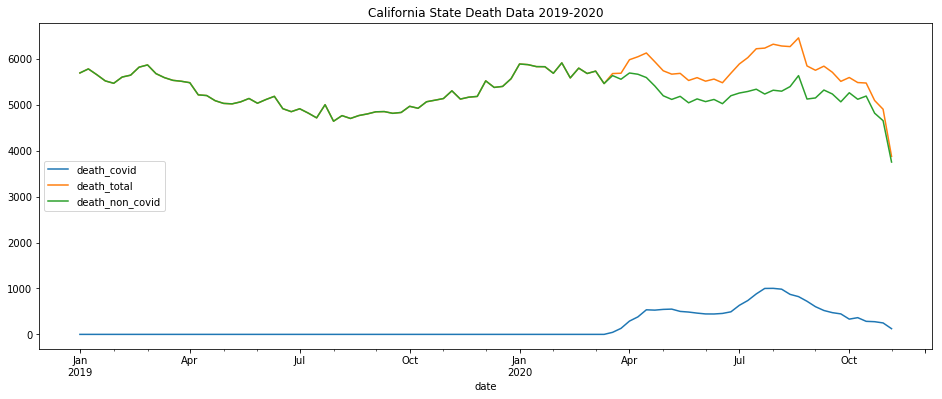

In [12]:
# View 3 - California Death from 2019
data[(data.index > '2019-01-01') & ((data["location"] == "California"))].plot(figsize=(16,6), title="California State Death Data 2019-2020")


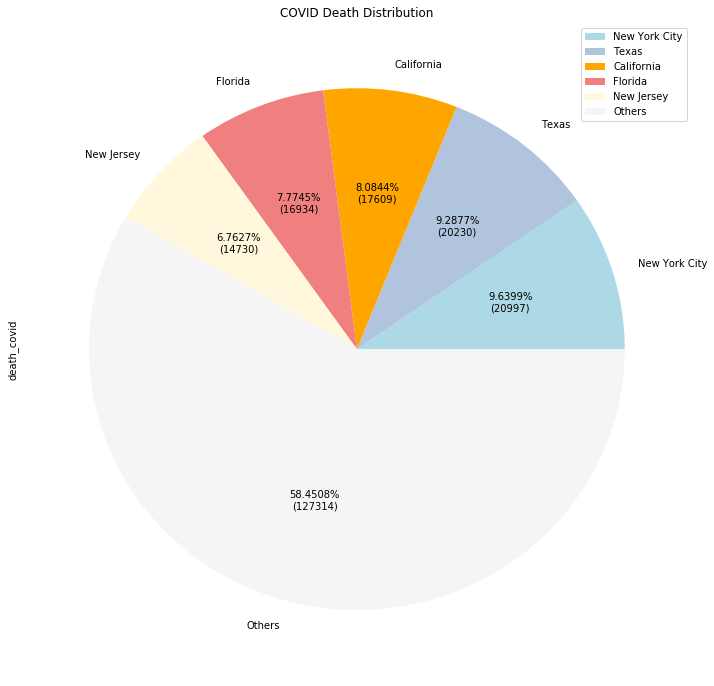

In [14]:
# View 4 - COVID Death Distribution
def my_format(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)
death_sum = data.loc[data["location"] != "United States", ["location", "death_covid"]].groupby("location").sum().sort_values("death_covid", ascending=False)
death_sum_top = death_sum.iloc[0:5]
death_sum_other = death_sum.iloc[6:].sum()
death_sum_other = death_sum_other.rename("Others")
death_sum_top = death_sum_top.append(death_sum_other)
total = death_sum_top.sum()[0]
my_colors = ['lightblue','lightsteelblue','orange','lightcoral','cornsilk','whitesmoke']
death_sum_top.plot.pie(y="death_covid", figsize=(12,12), title="COVID Death Distribution", autopct=my_format, colors=my_colors)